# Principal Component Analysis: "What", "When" and "How"

In the following article I am going to explain *what is* PCA (Principal Component Analysis), *when* use it and *how*.

## What is PCA?

Let's say you have a machine learning task. You are given a dataset with 500 variables and you want to predict something but 500 variables are too many to consider.
If you have worked with a lot of variables before, you know this can present problems. <br>
Do you understand the relationships between each variable? <br>
Do you have so many variables that you are in danger of overfitting your model to your data?

You might ask the question, “How do I take all of the variables I have collected and focus on only a few of them?” In technical terms, you want to “reduce the dimension of your feature space.” By reducing the dimension of your feature space, you have fewer relationships between variables to consider and you are less likely to overfit your model. (Note: This does not immediately mean that overfitting, etc. are no longer concerns — but we are moving in the right direction!)

Somewhat unsurprisingly, reducing the dimension of the feature space is called **dimensionality reduction**. There are many ways to achieve dimensionality reduction, but most of these techniques fall into one of two classes:

* Feature Elimination
* Feature Extraction

**Feature elimination** is what it sounds like: we reduce the feature space by eliminating features. Advantages of feature elimination methods include simplicity and maintaining interpretability of your variables.
As a disadvantage, though, you gain no information from those variables you have dropped. By eliminating features, we have also entirely eliminated any benefits those dropped variables would bring.

But we would like, somehow, to retain the benefits of the variables we dropped. Here is where **Feature extraction** comes to aid. <br>
Say we have ten independent variables. In feature extraction, we create ten “new” independent variables, where each “new” independent variable is a combination of each of the ten “old” independent variables. Doing so, we are still keeping the most valuable parts of our old variables, even when we drop one or more of these “new” variables!

Principal component analysis is a technique for feature extraction — so it combines our input variables in a specific way, then we can drop the “least important” variables while still retaining the most valuable parts of all of the variables! As an added benefit, each of the “new” variables after PCA **are all independent of one another**. 

## When should I use PCA?

1. Do you want to reduce the number of variables, but are not able to identify variables to completely remove from consideration?
2. Do you want to ensure your variables are independent of one another?
3. Are you comfortable making your independent variables less interpretable?

If you answered “yes” to all three questions, then PCA is a good method to use. If you answered “no” to question 3, you **should not** use PCA.

## How does PCA work?

In this section I am going to show how PCA works providing all the required functions I implemented to run the algorithm along with some examples.

### Functions

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import random
from scipy import ndimage
from skimage import io

def pca(X):
    m = X.shape[0]
    sigma = (1/m)*np.dot(X.T, X)
    u, s, vh = np.linalg.svd(sigma, full_matrices=True, compute_uv=True)
    return u, s

def projectData(X, U, K):
    U_reduced = U[:, 0:K]
    return np.dot(X, U_reduced), U_reduced

def recoverData(Z, U, K):
    return np.dot(Z, U.T)

def featureNormalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis= 0)
    X = (X-mu)/sigma
    return X, mu, sigma

def drawLine(p1, p2, c):
    plt.plot(p1, p2, color=c, linestyle='dashed')

def displayData(X):
    m = int(np.sqrt(X.shape[1]))
    fig = plt.figure(figsize=(8,8))
    plt.title('100 Random faces from the data set')
    random.seed(0)
    indexes = random.sample(range(1, X.shape[0]), 100)
    images = X[indexes,:]
    for i in np.arange(10):
        for j in np.arange(10):
            ax = fig.add_subplot(10, 10, (10*j+i)+1)
            ax.matshow(ndimage.rotate(images[10*j+i,:].reshape(m,m),-90), cmap = 'gray')
            plt.yticks(())
            plt.xticks(())
            plt.axis('tight')
    plt.show()

To show visually how PCA works, I a going to consider a 2D dataset and reducing it to one dimension (thus a straight line). The 2D dataset we take into account is the following:

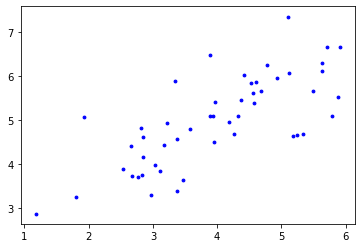

In [17]:
data = sio.loadmat('ex7data1.mat')
X = data['X']
plt.scatter(X[:, 0], X[:, 1], s=8, c='blue')
plt.axis('tight')
plt.show()

Before using PCA, it is important first to normalize the data by subtracting the mean value of each feature from the dataset, and scaling each dimension so that they are in the same range.

In [18]:
X_norm, average, sigma = featureNormalize(X)

Now we are ready to apply PCA algorithm which is accomplished by the following steps:. <br>
1. the first thing to do is to calculate a matrix that summarizes how our variables all relate to one another. This matrix is called *covariance matrix* and is given by:

    $$\sigma = \frac{1}{m} X^TX$$

    where *X* is the $m$ x $n$ data matrix (where $m$ is the number of rows and $n$ is the number of variables). <br><br>

2. then, we run the *Singular Value Decomposition* (SVD) algorithm. SVD will return two things:
    * the **direction vectors** of the data, namely the principal components (eigenvectors)
    * the **magnitude** of the direction vectors (eigenvalues)<br>
    With these information we can then understand the *directions* of our data and its *magnitude* (or how “important” each direction is).

These two steps are accomplished by the `pca` function:

In [19]:
direction_vectors, magnitude = pca(X_norm)

With the following code I am going to show the direction vectors and magnitude for our data:

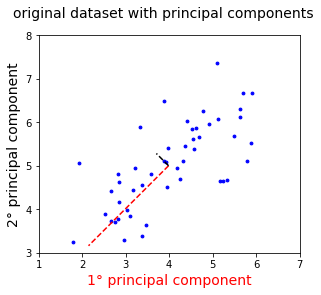

In [20]:
p1 = average + 1.5 * magnitude[0] * direction_vectors[:, 0].T
p2 = average + 1.5 * magnitude[1] * direction_vectors[:, 1].T
plt.scatter(X[:, 0], X[:, 1], s=8, c='blue')
plt.xlim(1, 7)
plt.ylim(3, 8)
plt.gca().set_aspect('equal', adjustable='box')
plt.draw()
drawLine(np.array([average[0], p1[0]]), np.array([average[1], p1[1]]), c='red')
drawLine(np.array([average[0], p2[0]]), np.array([average[1], p2[1]]), c='black')
plt.xlabel('1° principal component', fontsize=14, color='red');
plt.ylabel('2° principal component', fontsize=14, color='black');
plt.suptitle('original dataset with principal components', fontsize=14);

The “red direction” and the “black direction" are the two main directions of our data. In this case, the “red direction” is the more important one. Given how the dots are arranged, can you see why the “red direction” looks more important than the “black direction?” (Hint: what would fitting a line of best fit to this data look like?)

3. then, we transform our original data to align with these directions (which are combinations of our original variables).

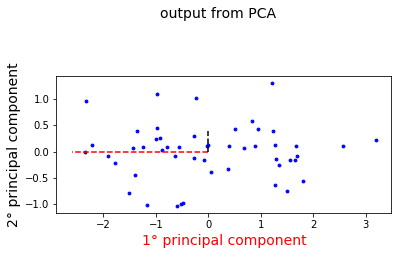

In [21]:
K=2
Z, _ = projectData(X_norm, direction_vectors, K)
Z_norm, average, sigma = featureNormalize(Z)
direction_vectors_2, magnitude = pca(Z)
p1 = average + 1.5 * magnitude[0] * direction_vectors_2[:, 0].T
p2 = average + 1.5 * magnitude[1] * direction_vectors_2[:, 1].T
plt.scatter(Z[:, 0], Z[:, 1], s=8, c='blue')
plt.gca().set_aspect('equal', adjustable='box')
plt.draw()
drawLine(np.array([average[0], p1[0]]), np.array([average[1], p1[1]]), c='red')
drawLine(np.array([average[0], p2[0]]), np.array([average[1], p2[1]]), c='black')
plt.suptitle('output from PCA', fontsize=14)
plt.xlabel('1° principal component', fontsize=14, color='red');
plt.ylabel('2° principal component', fontsize=14, color='black');

Note two things in this graphic:

* This charts show the exact same data as the previous chart, but this graph reflects the original data transformed so that our axes are now the principal components.
* In both graphs, the principal components are perpendicular to one another. In fact, every principal component will **always** be orthogonal (a.k.a. official math term for perpendicular) to every other principal component. **So, because our principal components are orthogonal to one another, they are statistically linearly independent of one another**.

### Projecting the data onto a lower dimension K

After computing the principal components, we can use them to reduce the feature dimension of our dataset by projecting each example onto a lower dimensional space, $x^{(i)} \rightarrow z^{(i)} $ (in this example, projecting the data from 2D to 1D). <br>
To do that, we will use our direction vectors returned by PCA and project the example dataset into a K-dimensional space. K in this example is 1, so we will select the first column (principal component) from our *direction_vectors* (in the underneath formula and the following I indicate this matrix as **D**) matrix and then multiplying it to our normalized dataset.
$$Z = D^T X$$

This operation is accomplished by the function `projectData`.

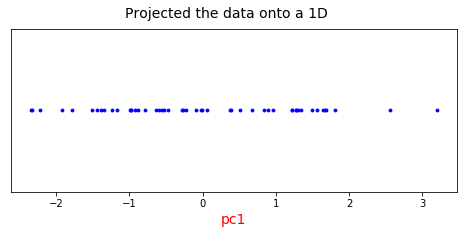

In [22]:
K=1
Z, direction_vectors_reduced = projectData(X_norm, direction_vectors, K)
plt.figure(figsize=(8, 3))
ones = np.ones((Z.shape[0], 1))
plt.scatter(Z, ones, s=8, c='blue')
plt.yticks(())
plt.axis('tight')
plt.suptitle('Projected the data onto a 1D', fontsize=14);
plt.xlabel('pc1', fontsize=14, color='red');
plt.show()

By projecting our data into a smaller space, we are reducing the dimensionality of our feature space… **but because we have transformed our data in these different “directions,” we have made sure to keep all original variables in our model!**

### Reconstructing an approximation of the data

After projecting the data onto a lower dimensional space, we can approximately recover the data by projecting them back onto the original high dimensional space. This action is accomplished by the funcion `recoverData`.

$$Z = D^T X \rightarrow X_{approx} = D Z^T \approx X$$

In [23]:
X_reconstructed = recoverData(Z, direction_vectors_reduced, K)

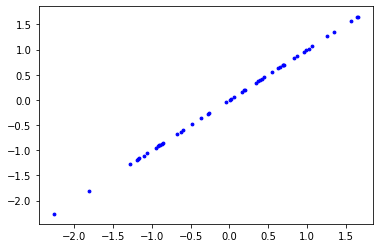

In [24]:
plt.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], s=8, c='blue')
plt.show()

### Visualizing the projections

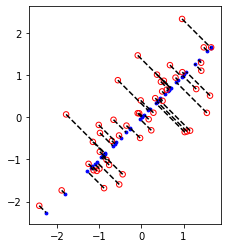

In [25]:
for i in range(X_norm.shape[0]):
    p1 = X_norm[i, :]
    p2 = X_reconstructed[i, :]
    drawLine(np.array([p1[0], p2[0]]), np.array([p1[1], p2[1]]), c='black')
plt.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], color='blue', s=8)
plt.scatter(X_norm[:, 0], X_norm[:, 1], s=30, color='red', facecolors='none')
plt.gca().set_aspect('equal', adjustable='box')
plt.draw()
plt.show()

We can see in the chart how the projections and then reconstruction affects the data. The original data points are indicated with the red circels, while the projected data points are indicated with the red dots. The projections effectively only retains the information in the direction given by "red direction".

## PCA on the face dataset

In this section we are going to will apply PCA to a real life dataset. The idea here is that we have $32 \times 32$ pixels greyscale pictures of faces and we want to reduce their size to $10 \times 10$, keeping as much information as possible about the original image. We still want to be able to recognize whose face we are looking at. It turns out that this is prefectly possible running PCA on the picture and projecting it on the subspace mapped by its top 100 (we can choose as many as we wish) principal components.

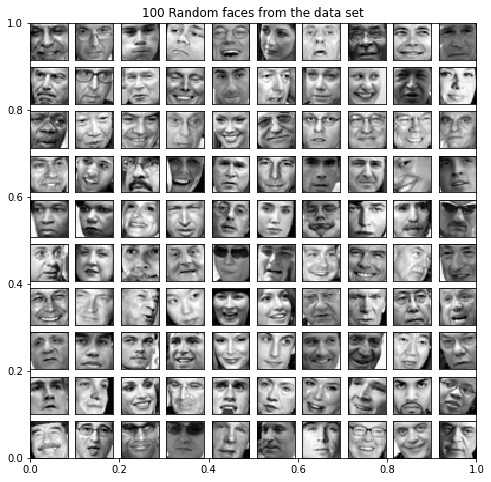

In [11]:
data = sio.loadmat('ex7faces.mat')
X = data['X']
displayData(X)

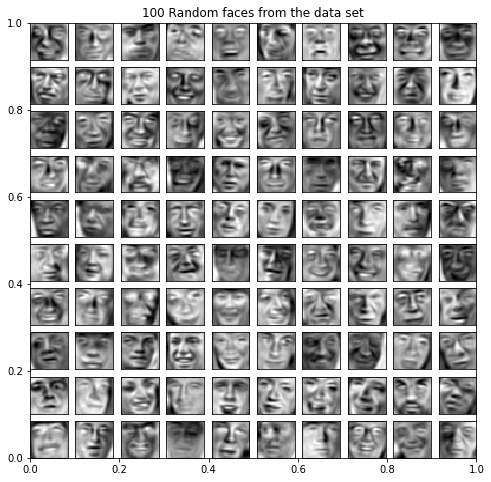

In [12]:
X_norm, average, sigma = featureNormalize(X)
direction_vectors, magnitude = pca(X_norm)
K = 100
Z, direction_vectors_reduced = projectData(X_norm, direction_vectors, K)
X_reconstructed = recoverData(Z, direction_vectors_reduced, K)
displayData(X_reconstructed)

From the reconstruction, it can be observed that the general and appearance of the face are kept while the fine details are lost. This is a remarkable reduction (more than 10$\times$) in the dataset size that can help speed up the learning algorithms significantly. <br>
For example, if someone were training a neural network to perform person recognitio (given a face image, predict the identity of the person), you can use the dimension reduced input of only a 100 dimensions instead of the original pixels.

### Appendix: how to estimate if we have chosen a good K

To estimate if our choice of K is good, we need to take the magnitude vector ($M$ in the folowing formula) returned from *SVD* algorithm and verify that:

$$\frac{\sum_{i=1}^{k} M_i}{\sum_{i=1}^{m} M_i} \geq 0.99 $$

Take into account the example of second the part:

In [13]:
data = sio.loadmat('ex7faces.mat')
X = data['X']
X_norm, average, sigma = featureNormalize(X)
direction_vectors, magnitude = pca(X_norm)
K = 100

Test with K=100:

In [14]:
round(magnitude[:K].sum() / magnitude[:].sum(), 3)

0.932

Here we can see that K=100 is not good enough, which means that we have lost to many informations during the dimensionality reduction. Try with K=350:

In [72]:
K = 350
round(magnitude[:K].sum() / magnitude[:].sum(), 3)

0.991

350 is a good value since it respects the disequation. Nice!

## Conclusion

Principal Component Analysis is essentially a method that reduces the dimension of the feature space in such a way that new variables are orthogonal to each other (i.e. they are independent or not correlated) and keep the most valuable parts of the variables we drop. The drawback is that it makes your independent variables less interpretable.